# Trolley study

## Measurement

The objective was to
- find 3 items in each drawer of a trolley with 5 drawers as fast as possible
- the time to find 3 items in each drawer is measured
- there are two trolleys:
    - new trolley with improved layout
    - old trolley

19 people participated in the challenge with
- 5 starting with the trolley with the new and improved layout
- 14 starting with the old trolley

In order to minimise the effect that people find the items quicker with practice in the statistical test, in the analysed data the number of people who started on the new trolley and those who started on the trolley should ideally be equal.

We introduce the following notation for these two categories:

- `NTF` = new trolley first
- `OTF` = old trolley first

Unfortunately, the number of people in these categories is imbalanced (5 starting on the new vs. 14 on the old), the pairing is not trivial.
The approach that we take here is to pair the 5 `NTF` people with 5 `OTF` out of 19 at a time.

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/edy/lib/build/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/edy/lib/build/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/edy/lib/build/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
plt.style.use('../python/matplotlib/styles/single_plot.mplstyle')

Reading in the measurements into a `pandas.DataFrame`

In [3]:
df = pd.read_csv('../data/measurements.dat', delim_whitespace=True)

In [4]:
df

,position,ot1,ot2,ot3,ot4,ot5,nt1,nt2,nt3,nt4,nt5,Order,ot_sum,nt_sum
0,Band 7,30.39,12.22,44.23,15.50,34.09,34.00,34.50,43.38,10.93,5.89,New trolley 1.,136.43,128.70
1,Band 4,44.30,19.17,60.00,9.11,8.42,17.91,25.77,55.48,6.02,9.93,New trolley 1.,141.00,115.11
2,Band 4,46.89,23.54,40.11,14.64,37.57,16.82,10.52,18.96,10.75,9.06,Old trolley 1.,162.75,66.11
3,Band 5,16.86,14.78,41.82,6.01,28.54,22.56,18.16,8.00,7.73,9.80,New trolley 1.,108.01,66.25
4,Band 5,17.67,15.98,38.53,4.35,36.78,13.00,20.80,4.59,4.60,10.29,Old trolley 1.,113.31,53.28
5,Band 5,18.84,33.64,23.90,5.19,37.22,16.29,5.70,9.00,6.80,7.23,Old trolley 1.,118.79,45.02
6,SHO Dr,58.97,23.13,7.96,3.53,17.88,24.77,4.36,6.49,3.96,6.66,Old trolley 1.,111.47,46.24
7,Band 6,22.06,19.48,22.28,7.72,16.35,14.70,21.07,20.81,8.76,16.59,New trolley 1.,87.89,81.93
8,Band 5,16.01,20.98,31.87,7.25,22.43,19.26,13.27,5.95,10.93,5.38,Old trolley 1.,98.54,54.79
9,Consult.,39.02,12.50,25.15,14.81,12.82,23.31,6.12,5.39,4.32,6.50,Old trolley 1.,104.30,45.64


where the columns correspond to:
- `position`: position of the person (Band 3-7, Consultant, Dr)
- `ot` = old trolley
- `nt` = new trolley
- `1,2,3,4,5`: drawer index, e.g. `ot2` is the time to find the 3 items in the second drawer of the old trolley
- `Order`: which trolley was first
- `ot_sum`: sum of the measured times for all the drawers in the old trolley
- `nt_sum`: sum of the measured times for all the drawers in the new trolley

Separating people who started on the new trolley and those who started on the old trolley.

In [5]:
NTF = df.query("Order == 'New trolley 1.'")
OTF = df.query("Order == 'Old trolley 1.'")

In [6]:
len(NTF)

5

In [7]:
len(OTF)

14

As we descrbibed in the introduction there are
- 5 people who started on the new trolley = `NTF`
- 14 people who started on the old trolley = `OTF`

## Total trolley times

`total trolley time` = sum of the measured times of all drawers within the trolley

### Creating batches balanced pairings (pairing 5 `OTF` and 5 `NTF`)

Unfortunately, the number of people in these categories is imbalanced (5 starting on the new vs. 14 on the old), the pairing is not trivial.
The approach that we take here is to pair the 5 `NTF` people with 5 `OTF` out of 19 at a time, creating 3 batches of pairings.

First batch:
- all the 5 `NTF` people
- the first 5 `OTF` people out of 14


- `B1_OT_total_time` = old trolley total times within the first batch
- `B1_NT_total_time` = new trolley total times within the first batch

In [8]:
B1_OT_total_time = np.append(NTF['ot_sum'].values, OTF[0:5]['ot_sum'].values)
B1_NT_total_time = np.append(NTF['nt_sum'].values, OTF[0:5]['nt_sum'].values)

Second batch:
- all the 5 `NTF` people
- the second 5 `OTF` people out of 14

In [9]:
B2_OT_total_time = np.append(NTF['ot_sum'].values, OTF[5:10]['ot_sum'].values)
B2_NT_total_time = np.append(NTF['nt_sum'].values, OTF[5:10]['nt_sum'].values)

Third batch:

- all the 5 `NTF` people
- the last 5 `OTF` people out of 14 (note that 1 person is also in the second batch)

In [10]:
B3_OT_total_time = np.append(NTF['ot_sum'].values, OTF[-6:-1]['ot_sum'].values)
B3_NT_total_time = np.append(NTF['nt_sum'].values, OTF[-6:-1]['nt_sum'].values)

Batches

In [11]:
batches = [(B1_OT_total_time, B1_NT_total_time),
           (B2_OT_total_time, B2_NT_total_time),
           (B3_OT_total_time, B3_NT_total_time)]

### Visualising the distribution of measured total times for old and new trolley within the batches

#### Violin plots

Text(0,0.5,'Total time [s]')

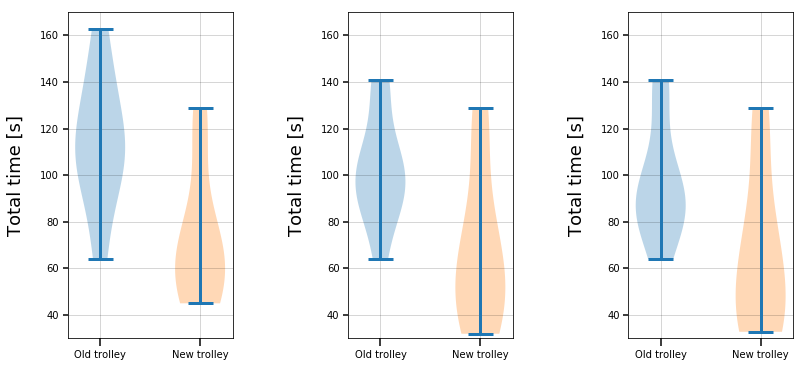

In [12]:
f,axes = plt.subplots(ncols=3, figsize=(13,6))
a = axes.flatten()
violins1 = a[0].violinplot((B1_OT_total_time, B1_NT_total_time), (1.0, 2.0))
violins2 = a[1].violinplot((B2_OT_total_time, B2_NT_total_time), (1.0, 2.0))
violins3 = a[2].violinplot((B3_OT_total_time, B3_NT_total_time), (1.0, 2.0))

violins1['bodies'][0].set_facecolor('C0')
violins1['bodies'][1].set_facecolor('C1')

violins2['bodies'][0].set_facecolor('C0')
violins2['bodies'][1].set_facecolor('C1')

violins3['bodies'][0].set_facecolor('C0')
violins3['bodies'][1].set_facecolor('C1')

a[0].set_ylim(30,170)
a[1].set_ylim(30,170)
a[2].set_ylim(30,170)

a[0].set_xticks((1.0, 2.0))
a[0].set_xticklabels(('Old trolley', 'New trolley'))
a[0].set_ylabel('Total time [s]')

a[1].set_xticks((1.0, 2.0))
a[1].set_xticklabels(('Old trolley', 'New trolley'))
a[1].set_ylabel('Total time [s]')

a[2].set_xticks((1.0, 2.0))
a[2].set_xticklabels(('Old trolley', 'New trolley'))
a[2].set_ylabel('Total time [s]')

First batch only

In [13]:
B1_OT_total_time_mean = np.mean(B1_OT_total_time)
B1_NT_total_time_mean = np.mean(B1_NT_total_time)
B1_OT_total_time_mean, B1_NT_total_time_mean

(114.225, 72.84)

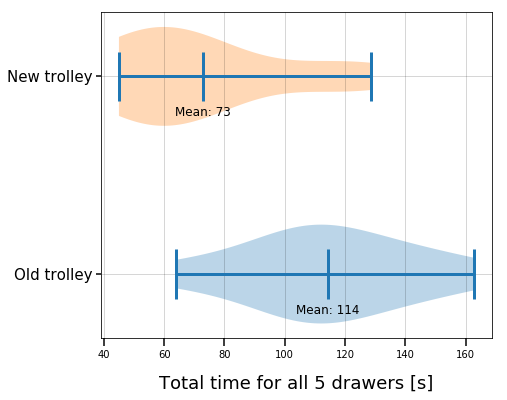

In [14]:
f,a = plt.subplots(ncols=1, figsize=(7,6))
violins1 = a.violinplot((B1_OT_total_time, B1_NT_total_time), vert=False, showmedians=False, showmeans=True)

violins1['bodies'][0].set_facecolor('C0')
violins1['bodies'][1].set_facecolor('C1')

a.set_yticks((1.0, 2.0))
a.set_yticklabels(('Old trolley', 'New trolley'), fontsize=15)
a.set_xlabel('Total time for all 5 drawers [s]')

B1_NT_total_time_mean_label = "Mean: {:.0f}".format(B1_NT_total_time_mean)
B1_OT_total_time_mean_label = "Mean: {:.0f}".format(B1_OT_total_time_mean)

a.text(B1_NT_total_time_mean, 1.8, B1_NT_total_time_mean_label, horizontalalignment='center')
a.text(B1_OT_total_time_mean, 0.8, B1_OT_total_time_mean_label, horizontalalignment='center')

f.savefig('../figures/violin_plot_first_batch_5_OTF_5_NTF.pdf', bbox_inches='tight')
f.savefig('../figures/violin_plot_first_batch_5_OTF_5_NTF.png', bbox_inches='tight')

## Statistical test

### Welch's $t$-test

**References:**
- https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_unequal_variances
- https://en.wikipedia.org/wiki/Welch%27s_t-test
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html

> In statistics, Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that two populations have equal means. Welch's t-test is an adaptation of Student's t-test, and is more reliable when the two samples have unequal variances and unequal sample sizes.

Here the populations are:
- old trolley times
- new trolley times

**It is important to emphasize what assumption go in the statistical analysis.**

#### Assumptions:
- measured times are distributed as a normal distribution
- the variance of the two populations is not equal

These two assumptions at this level are questionable, as there are not enough data points to positively confirm these!

#### Hypothesis definitions

Null hypothesis $H_{0}$ is:
- the two population means (mean of the old trolley times and mean of the new trolley times) are equal.


Alternative hypothesis is $H_{1}$ is:
- mean of the new trolley times is smaller than the mean of the old trolley times $\equiv$ people are faster with the new trolely

#### Welch's $t$-test statistic

\begin{equation}
    t
    =
    \frac{ \bar{X}_{1} - \bar{X}_{2} }
    { 
      \sqrt{ \frac{ s^{2}_{1} }{ N_{1} }  +                          \frac{ s^{2}_{2} }{ N_{2} } }
    }
\end{equation}

where in our case:
- $X_{1}$: measured times in the old trolley
- $X_{2}$: measured times in the new trolley
- $\bar{X}_{i}$: mean of the measured times
- $s^{2}_{i}$: sample variance
- $N_{i}$: sample size

#### Distribution of Welch's $t$-test statistic

See https://en.wikipedia.org/wiki/Welch's_t-test#Calculations

#### Procedure

We evaluate the $p$-value under $H_{0}$, and if the $p$-values is less than 0.05, we reject $H_{0}$.

Below we show the histogram of the measured times and evaluate the test statistic $t$ and the corresponding p-value evaluated with `scipy.stats.ttest_ind()`

Plotting functions

In [15]:
def show_histogram(old_trolley_times, new_trolley_times):
    
    f,a = plt.subplots()
    a.hist(old_trolley_times, color='C0', label='Old trolley', range=(0.0, 180.0), bins=90)
    a.hist(new_trolley_times, color='C1', label='New trolley', range=(0.0, 180.0), bins=90)
    
    t,pval =scipy.stats.ttest_ind(old_trolley_times, new_trolley_times, equal_var=False)
    title = r"$t= {:.3f}$, $p$-value = {:.4f}".format(t, pval)
    
    a.set_xlabel('Total time [s]')
    a.set_ylabel('Frequency')
    
    a.set_title(title)
    a.legend()
    
    return f,a, t,pval

In [16]:
def show_scatter(old_trolley_times, new_trolley_times):
    
    f,a = plt.subplots()
    
    nsize = len(old_trolley_times)
    
    x1 = np.random.uniform(0.0, 0.4, size=nsize)
    x2 = np.random.uniform(0.6, 1.0, size=nsize)
    
    a.scatter(x1, new_trolley_times, color='C1', label='New trolley')
    a.scatter(x2, old_trolley_times, color='C0', label='Old trolley')
    
    t,pval = scipy.stats.ttest_ind(old_trolley_times, new_trolley_times, equal_var=False)
    title = r"$t= {:.3f}$, $p$-value = {:.4f}".format(t, pval)
    
    a.set_ylabel('Total time [s]')
    a.set_xlabel('')
    a.set_xticks(())
    
    #a.set_title(title)
    a.legend()
    
    return f,a, t,pval

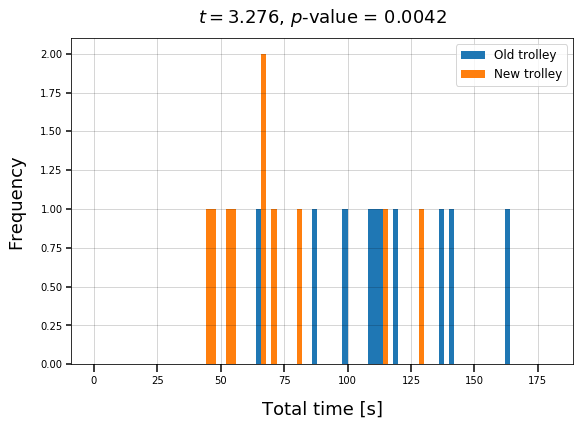

In [17]:
f,a,t,pval = show_histogram(B1_OT_total_time, B1_NT_total_time)
f.savefig('../figures/histogram_first_batch_5_OTF_5_NTF.pdf', bbox_inches='tight')
f.savefig('../figures/histogram_first_batch_5_OTF_5_NTF.png', bbox_inches='tight')

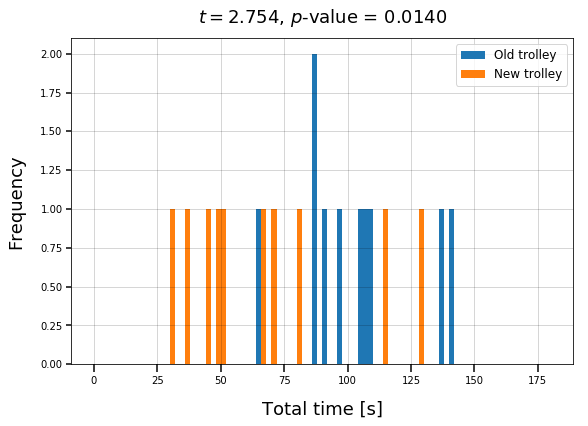

In [18]:
f,a,t,pval = show_histogram(B2_OT_total_time, B2_NT_total_time)

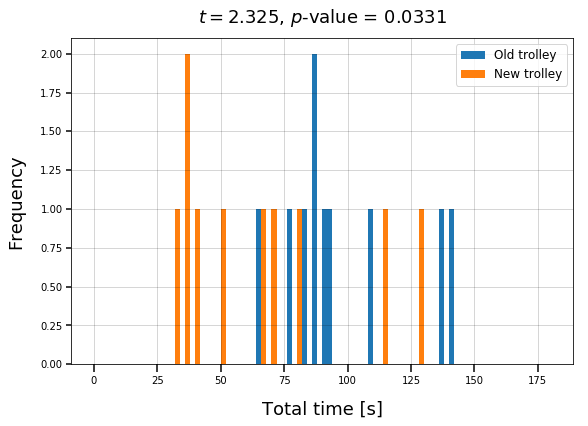

In [19]:
f,a,t,pval = show_histogram(B3_OT_total_time, B3_NT_total_time)

**Observation:**
In all batches the observed $p$-value for $H_{0}$ is less than 0.05, which indicates that $H_{0}$ be rejected in favour of $H_{1}$.

We do have to be careful with claiming significant discovery as:
- very limited data: 5 `NTF`, 14 `OTF`
- assumed a specific distribution for the distribution of the times (normal distribution). It is advisable to evaluate the p-value assuming other distributions as well.

Scatter plot

(<Figure size 648x432 with 1 Axes>,
 3.2762730476121953,
 0.004195982858812412)

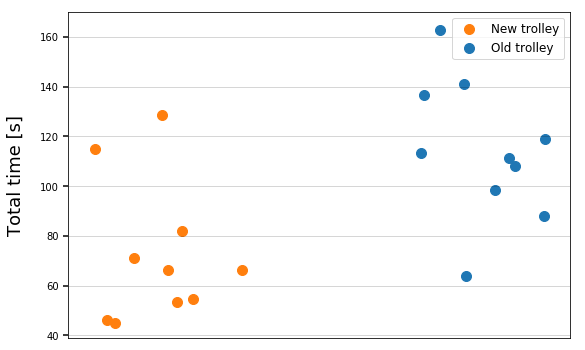

In [20]:
show_scatter(B1_OT_total_time, B1_NT_total_time)

### Detailed derivation on first batch to cross-check `scipy.stats.ttest_ind()`

In [21]:
x1 = B1_OT_total_time
x2 = B1_NT_total_time

In [22]:
n1 = len(x1)
n2 = len(x2)

Mean

In [23]:
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
x1_mean, x2_mean

(114.225, 72.84)

In [24]:
x1_mean - x2_mean

41.38499999999999

In [25]:
(x1_mean - x2_mean)/5

8.276999999999997

Median

In [26]:
x1_median = np.median(B1_OT_total_time)
x2_median = np.median(B1_NT_total_time)
x1_median, x2_median

(112.38999999999999, 66.18)

In [27]:
x1_median - x2_median

46.20999999999998

In [28]:
(x1_median - x2_median)/5

9.241999999999996

Sample variance

In [29]:
x1_var = np.var(x1, ddof=1)
x2_var = np.var(x2, ddof=1)
x1_var, x2_var

(787.6232944444441, 807.9829999999997)

Test statistic

In [30]:
t = (x1_mean - x2_mean)/np.sqrt( (x1_var/n1) + (x2_var/n2))

In [31]:
t

3.2762730476121953

In [32]:
nu = ((x1_var/n1) + (x2_var/n2))**2/( (x1_var**2)/(n1**2 * (n1-1) ) + (x2_var**2)/(n2**2 * (n2-1) ) )
nu

17.997069826706664

In [33]:
p_value = 1 - scipy.stats.t.cdf(t, df=nu)
p_value

0.002097991429406143

In [34]:
result = scipy.stats.ttest_ind(B1_OT_total_time, B1_NT_total_time)

The p-value quoted by `ttest_ind` corresponds to a two tailed-test, whereas we know the directionality in our alternative hypothesis $H_{1}$ which assumes that new trolley mean time is shorter. Therefore we need the 1 tailed p-value which is half of the two tailed one.

In [35]:
result.pvalue/2

0.002097641117795145


Conclusion: `scipy.stats.ttest_ind()` seems to be consistent with the manual numerical derivation for a specific example. 

-----

### First trolley new vs. old

Text(0.5,1,'First: old')

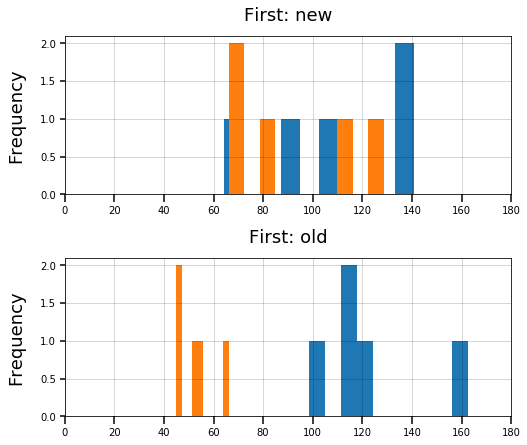

In [36]:
f,a = plt.subplots(nrows=2, figsize=(8,7))
a = a.flatten()
NTF['ot_sum'].plot.hist(ax=a[0], color='C0')
NTF['nt_sum'].plot.hist(ax=a[0], color='C1')

OTF[0:5]['ot_sum'].plot.hist(ax=a[1], color='C0')
OTF[0:5]['nt_sum'].plot.hist(ax=a[1], color='C1')

a[0].set_xlim(0.0, 180)
a[1].set_xlim(0.0, 180)

a[0].set_title('First: new')
a[1].set_title('First: old')

## Per drawer

In [37]:
ndrawers = 5

Text(0.5,1,'First old')

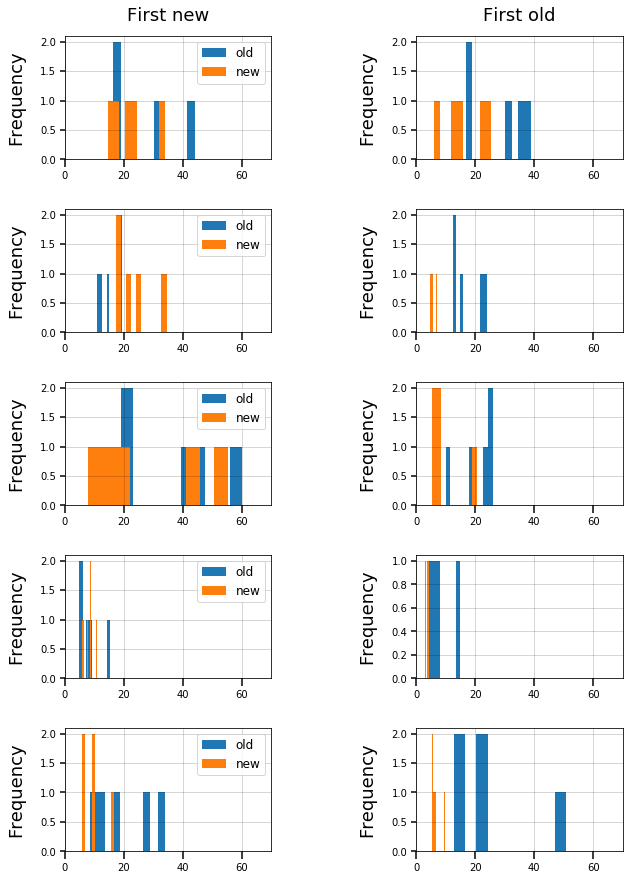

In [38]:
f,a = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
#a = a.flatten()
for i in range(1,ndrawers+1):
    
    drawer_old_str = "ot{}".format(i) 
    drawer_new_str = "nt{}".format(i)
    
    NTF[drawer_old_str].plot.hist(color="C0", ax=a[i-1][0], label='old')
    NTF[drawer_new_str].plot.hist(color="C1", ax=a[i-1][0], label='new')

    OTF[5:10][drawer_old_str].plot.hist(color="C0", ax=a[i-1][1], label='old')
    OTF[5:10][drawer_new_str].plot.hist(color="C1", ax=a[i-1][1], label='new')
    
    a[i-1][0].set_xlim(0.0, 70)
    a[i-1][1].set_xlim(0.0, 70)
    a[i-1][0].legend()
    
a[0][0].set_title("First new")
a[0][1].set_title("First old")

## Total drawer times

Here we show the distribution of the measured total times for old and new trolleys for **all the people** (5 NTF, 14 OTF).

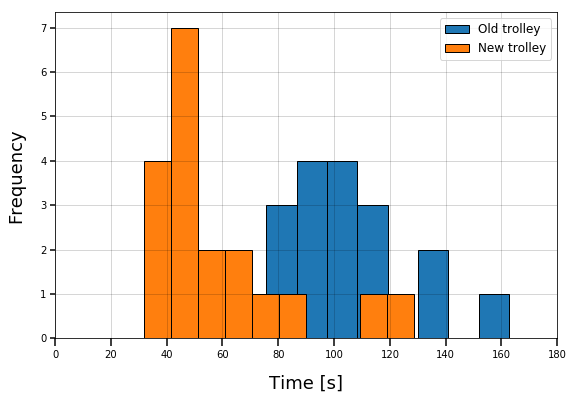

In [39]:
f,a = plt.subplots()
df['ot_sum'].plot.hist(color='C0',edgecolor='k',ax=a, label='Old trolley')
df['nt_sum'].plot.hist(color='C1',edgecolor='k',ax=a, label='New trolley')
a.set_xlabel('Time [s]')
a.set_xlim(0.0, 180)
a.legend()